In [2]:
# Importing data using Pandas
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Exploratory Data Analysis
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# Looking for missing values in train data
titanic_train = [train]
for dataset in titanic_train:
    print(pd.isnull(dataset).sum()>0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [10]:
# Looking for missing values in test data
titanic_test = [test]
for dataset in titanic_test:
    print(pd.isnull(dataset).sum()>0)

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [11]:
# Count of the missing values for each attribute in train data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Count of the missing values for each attribute in test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# Bar Chart 
def bar_chart(feature):
    People_survived = train[train['Survived']==1][feature].value_counts()
    People_dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([People_survived,People_dead])
    df.index = ['People_Survived','People_Dead']
    df.plot(kind='bar',stacked=True, figsize=(8,6))

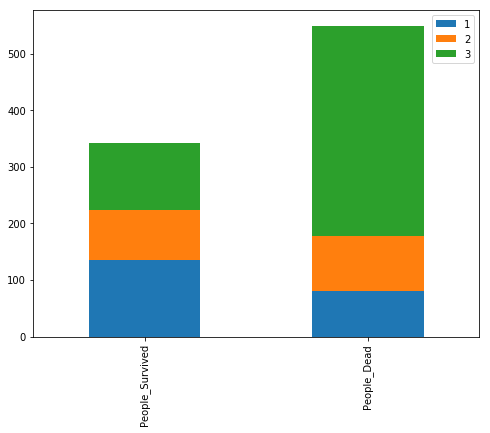

In [15]:
# Bar Chart for PClass attribute 
bar_chart('Pclass')

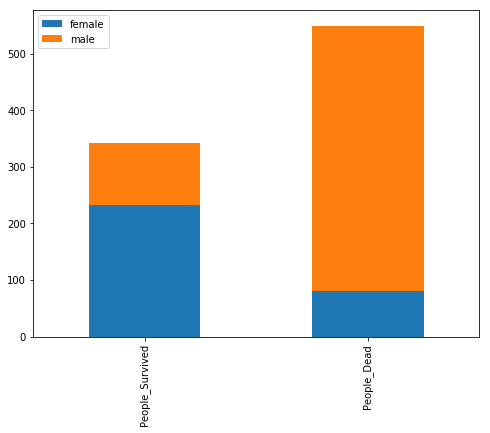

In [16]:
# Bar Chart for Sex attribute 
bar_chart('Sex')

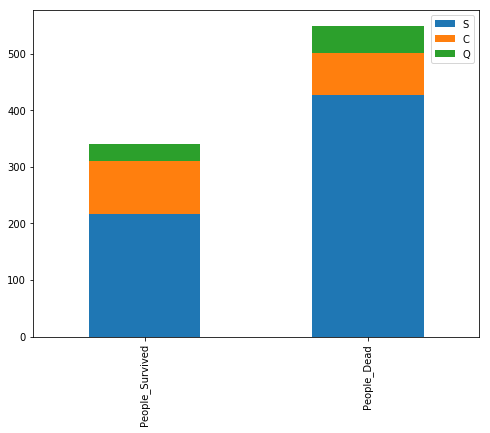

In [17]:
# Bar Chart for Embarked attribute 
bar_chart('Embarked')

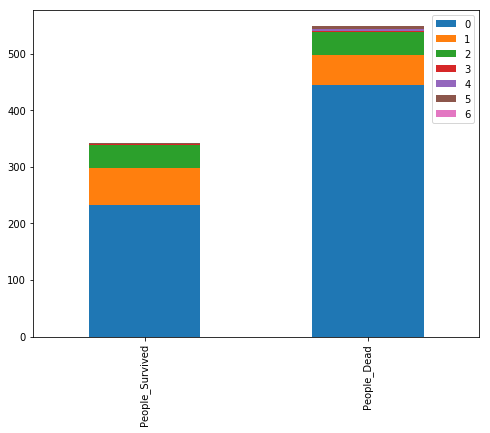

In [18]:
# Bar Chart for Parch attribute 
bar_chart('Parch')

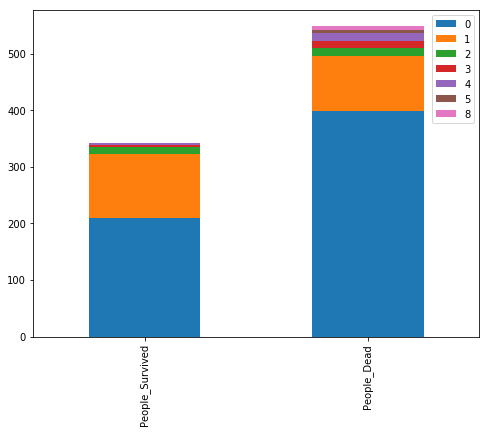

In [19]:
# Bar Chart for SibSp attribute 
bar_chart('SibSp')

In [20]:
# Impact of PClass on the class variable
print(train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [21]:
# Impact of Sex on the class variable
print(train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [22]:
# Impact of SibSp on the class variable
print(train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [23]:
# Impact of Parch on the class variable
print(train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


In [24]:
 # Merging train and test data
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Sir           1
Ms            1
Capt          1
Mme           1
Don           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [26]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [27]:
# Mapping title to labels 0,1,2,3.
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [30]:
train.drop('Name',axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [33]:
# Filling missing values of Embarked
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].fillna('S')
    print(train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [34]:
# Mapping 
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [35]:
# Filling missing values of Fare
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [36]:
# Filling missing values of Age
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [37]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [38]:
# Mapping Cabin 
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [39]:
# Filling missing values of Cabin
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [40]:
# Mapping Sex
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [41]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 25), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 60), 'Age'] = 4,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 5

In [42]:
# Validation after filling the missing values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [43]:
# Validation after filling the missing values
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [44]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,2.0,0,0
1,2,1,1,1,4.0,1,0,PC 17599,71.2833,0.8,1,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1
3,4,1,1,1,3.0,1,0,113803,53.1000,0.8,0,2
4,5,0,3,0,3.0,0,0,373450,8.0500,2.0,0,0
5,6,0,3,0,3.0,0,0,330877,8.4583,2.0,2,0
6,7,0,1,0,4.0,0,0,17463,51.8625,1.6,0,0
7,8,0,3,0,1.0,3,1,349909,21.0750,2.0,0,3
8,9,1,3,1,3.0,0,2,347742,11.1333,2.0,0,2
9,10,1,2,1,1.0,1,0,237736,30.0708,1.8,1,2


In [45]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,3.0,0,0,330911,7.8292,2.0,2,0
1,893,3,1,4.0,1,0,363272,7.0000,2.0,0,2
2,894,2,0,5.0,0,0,240276,9.6875,2.0,2,0
3,895,3,0,3.0,0,0,315154,8.6625,2.0,0,0
4,896,3,1,2.0,1,1,3101298,12.2875,2.0,0,2
5,897,3,0,1.0,0,0,7538,9.2250,2.0,0,0
6,898,3,1,3.0,0,0,330972,7.6292,2.0,2,1
7,899,2,0,3.0,1,1,248738,29.0000,2.0,0,0
8,900,3,1,2.0,0,0,2657,7.2292,2.0,1,2
9,901,3,0,2.0,2,0,A/4 48871,24.1500,2.0,0,0


In [46]:
# Dropping the Ticket attribute
train = train.drop(['Ticket',], axis=1)
test = test.drop(['Ticket'], axis=1)


In [47]:
# Dropping the PassengerID attribute
train = train.drop(['PassengerId'], axis=1)

In [48]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,2.0,1,0,7.2500,2.0,0,0
1,1,1,1,4.0,1,0,71.2833,0.8,1,2
2,1,3,1,3.0,0,0,7.9250,2.0,0,1
3,1,1,1,3.0,1,0,53.1000,0.8,0,2
4,0,3,0,3.0,0,0,8.0500,2.0,0,0


In [49]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,3.0,0,0,7.8292,2.0,2,0
1,893,3,1,4.0,1,0,7.0000,2.0,0,2
2,894,2,0,5.0,0,0,9.6875,2.0,2,0
3,895,3,0,3.0,0,0,8.6625,2.0,0,0
4,896,3,1,2.0,1,1,12.2875,2.0,0,2


In [50]:
# Dropping the class variable
train_data = train.drop('Survived', axis=1)
class_variable = train['Survived']
train_data.shape,class_variable.shape

((891, 9), (891,))

In [51]:
# Modeling
# Importing modules of classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


import numpy as np

In [52]:
# Importing K Fold cross validation module
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [53]:
# Logistic Regression Classifier
LogReg = LogisticRegression()
LogReg.fit(train_data, class_variable)
print('Coefficients (m): \n', LogReg.coef_)
print('Intercept (b): \n', LogReg.intercept_)


Coefficients (m): 
 [[-1.03066495  2.01165259 -0.39031183 -0.43854334 -0.22755409  0.00541971
   0.30944457  0.19917822  0.65269652]]
Intercept (b): 
 [1.17147058]


C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
predicted = LogReg.predict(train_data)
print("Predictions: \n", np.array([predicted]).T)


Predictions: 
 [[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]


In [55]:
print("Probability of prediction: \n",LogReg.predict_proba(train_data))

Probability of prediction: 
 [[0.92283534 0.07716466]
 [0.09186033 0.90813967]
 [0.44158554 0.55841446]
 ...
 [0.54598694 0.45401306]
 [0.60367582 0.39632418]
 [0.88413781 0.11586219]]


In [56]:
print("Accuracy score for the model: \n", LogReg.score(train_data,class_variable))
# Accuracy of the Logistic Regression model

Accuracy score for the model: 
 0.8159371492704826


In [2]:
model = LogisticRegression()
scores = cross_val_score(model, train_data, class_variable, cv=k_fold)
print("Accuracy of every fold in 10 fold cross validation: ", abs(scores))
print("Mean of the 10 fold cross-validation: %0.2f" % abs(scores.mean()))
# Mean of the accuracy of the Logistic Regression model using 10 fold cross validation

NameError: name 'LogisticRegression' is not defined

In [58]:
# knn Classifer
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
Accuracy = 'accuracy'
knn_score = cross_val_score(knn_classifier, train_data, class_variable, cv=k_fold, n_jobs=1, scoring=Accuracy)
print(knn_score)

[0.72222222 0.7752809  0.78651685 0.73033708 0.82022472 0.73033708
 0.71910112 0.80898876 0.75280899 0.79775281]


In [59]:
# Mean of the accuracy of the knn classifier model using 10 fold cross validation
round(np.mean(knn_score)*100, 2)

76.44

In [60]:
# Decision tree classifier
decisiontree_classifier = DecisionTreeClassifier()
Accuracy = 'accuracy'
decisiontree_score = cross_val_score(decisiontree_classifier, train_data, class_variable, cv=k_fold, n_jobs=1, scoring=Accuracy)
print(decisiontree_score)

[0.8        0.86516854 0.78651685 0.75280899 0.78651685 0.80898876
 0.76404494 0.80898876 0.76404494 0.83146067]


In [61]:
# Mean of the accuracy of the Decision tree model using 10 fold cross validation
round(np.mean(decisiontree_score)*100, 2)

79.69

In [62]:
# Naive Bayes Classifier
naivebayes_classifier = GaussianNB()
Accuracy = 'accuracy'
naivebayes_score = cross_val_score(naivebayes_classifier, train_data, class_variable, cv=k_fold, n_jobs=1, scoring=Accuracy)
print(naivebayes_score)

[0.8        0.71910112 0.75280899 0.75280899 0.73033708 0.82022472
 0.80898876 0.79775281 0.82022472 0.80898876]


In [63]:
# Mean of the accuracy of the Naive Bayes model using 10 fold cross validation
round(np.mean(naivebayes_score)*100, 2)

78.11

In [64]:
# Using Logistic Regression model because of its highest accuracy
final_classifier =LogisticRegression()
final_classifier.fit(train_data, class_variable)
test_data = test.drop("PassengerId", axis=1).copy()
prediction = final_classifier.predict(test_data)

C:\Users\sudhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
prediction_df= pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

prediction_df.to_csv('prediction_df.csv', index=False)

In [66]:
# Predicted class variable for the test data
prediction_df = pd.read_csv('prediction_df.csv')
prediction_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
